In [1]:
import nibabel as nib
from nilearn import glm
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import h5py
import scipy
from scipy.io import loadmat 
import os
import glob

/home/jmlee/.conda/envs/encoding/lib/python3.7/site-packages/nilearn/glm/__init__.py:56: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  'It may change in any future release of Nilearn.', FutureWarning)


# Concat CNN activation time series in the 1st layer across movie segments

In [18]:
layername = ['/conv1','/conv2','/conv3','/conv4','/conv5','/fc6','/fc7','/fc8']
dataroot = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/feature_extracted/'

Training movies

In [19]:
lay = 0

for seg in range(1,19):
    print('seg:' , str(seg))
    secpath = (dataroot + 'AlexNet_feature_maps_processed_seg'+ str(seg) + '.h5')
    lay_feat = h5py.File(secpath, 'r')
    lay_feat = lay_feat[layername[lay] + '/data']
    lay_feat = lay_feat.value
    lay_feat = np.transpose(lay_feat,(3,2,1,0))
    print('lay_feat: ',lay_feat.shape)
    dim = lay_feat.shape
    print('dim:', dim)
    Nf = dim[-1]
    print('Nf:', Nf)
    if seg == 1:
        dim_array = np.asarray(dim)
        dim_array[-1] = Nf*18
        print(dim_array)
        lay_feat_concatenated = np.zeros(dim_array[0:4])
        print('lay_feat_concatenated:',lay_feat_concatenated.shape)
    lay_feat_concatenated[:,:,:,(seg-1)*Nf+0:seg*Nf] = lay_feat
    print(lay_feat.shape)

seg: 1
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
[  55   55   96 4320]
lay_feat_concatenated: (55, 55, 96, 4320)


/home/jmlee/.conda/envs/encoding/lib/python3.7/site-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


(55, 55, 96, 240)
seg: 2
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 3
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 4
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 5
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 6
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 7
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 8
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 9
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 10
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 11
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 12
lay_feat:  (55, 55, 96, 240)
dim: (55, 55, 96, 240)
Nf: 240
(55, 55, 96, 240)
seg: 13
lay_feat:  (55, 55, 96, 240)
dim: (5

In [87]:
lay_feat_load = scipy.io.loadmat('/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/lay_feat_seg1.mat')

In [131]:
a.shape

(55, 55, 96, 240)

In [132]:
filters=np.transpose(a, (0,1,3,2))
filters.shape

(55, 55, 240, 96)

In [ ]:
f = filters[:,:,:,]

# plot

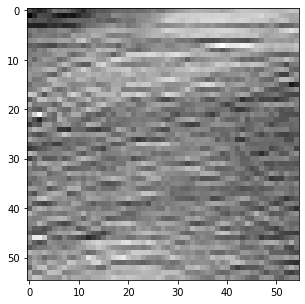

In [150]:
ix = 1
fig = plt.figure(figsize=(5,5))

for i in range(1):
    f = filters[:,:,:,i]
    # plt.imshow(f[:,:,:,i])
for j in range(1):
    plt.subplot(1,1,ix)
    plt.imshow(f[:,:,j], cmap='gray')
    # print(f[:,:,j].shape)
    ix+=1
plt.show()


In [137]:
n_filters=96
ix = 1
fig = plt.figure(figsize=(10,10))
f = filters[:,:,:,96]
# for i in range(n_ilters):
#  f = filters[:,:,:,i]
    # plt.imshow(f[:,:,:,i])
for j in range(55):
    plt.subplot(96,16,ix)
    plt.imshow(f[:,:,j], cmap='gray')
    # print(f[:,:,j].shape)
    ix+=1
plt.show()

IndexError: index 96 is out of bounds for axis 3 with size 96

<Figure size 720x720 with 0 Axes>

ValueError: '' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

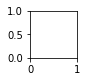

In [110]:
n_filters=96
ix = 1
fig = plt.figure(figsize=(100,100))
for i in range(n_filters):
    f = a[:,:,:,i]
for j in range(96):
    plt.subplot(n_filters,10,ix)
    plt.imshow(f[:,:,j], cmap='')
    # print(f[:,:,j].shape)
    ix+=1
plt.show()

# lay_feat_concatened

In [4]:
dim = lay_feat_concatenated.shape
dim= np.asarray(dim)

In [5]:
lay_feat_concatenated = lay_feat_concatenated.reshape(np.prod(dim[:-1]),dim[-1],order='F').copy()
print(lay_feat_concatenated.shape)

(290400, 4320)


In [6]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_feat_concat_reshape.mat'
lay_concat_reshape = h5py.File(dir , 'r')
print(lay_concat_reshape.keys())
lay_concat_reshape = lay_concat_reshape['lay_feat_concatenated']
lay_concat_reshape = np.transpose(lay_concat_reshape,(1,0))
print(lay_concat_reshape.shape)

<KeysViewHDF5 ['lay_feat_concatenated']>
(290400, 4320)


In [7]:
a_list = []
for i in range(100):
    r = np.corrcoef(lay_feat_concatenated[:,i].ravel(), lay_concat_reshape[:,i].ravel())[0,1]
    a_list.append(r)
    
print(np.mean(a_list))
print(np.array_equal(lay_feat_concatenated, lay_concat_reshape))

1.0
True


# lay_feat_concatenated_mean

In [7]:
lay_feat_concatenated_mean = np.mean(lay_feat_concatenated,1)
lay_feat_concatenated_mean = np.expand_dims(lay_feat_concatenated_mean,-1)
print(lay_feat_concatenated_mean.shape)

(290400, 1)


In [9]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_feat_concat_mean.mat'
lay_concat_mean = h5py.File(dir , 'r')
print(lay_concat_mean.keys())
lay_concat_mean = lay_concat_mean['lay_feat_concatenated_mean']
lay_concat_mean = np.transpose(lay_concat_mean,(1,0))
print(lay_concat_mean.shape)

<KeysViewHDF5 ['lay_feat_concatenated_mean']>
(290400, 1)


In [18]:
a_list = []
for i in range(100):
    r = np.corrcoef(lay_feat_concatenated_mean[i:,].ravel(), lay_concat_mean[i:,].ravel())[0,1]
    a_list.append(r)
    
print(np.mean(a_list))
print(np.array_equal(lay_feat_concatenated_mean, lay_concat_mean))

0.9999999999999291
False


# lay_feat_concatenated_std

In [8]:
lay_feat_concatenated_std = lay_feat_concatenated.std(1)
lay_feat_concatenated_std = np.expand_dims(lay_feat_concatenated_std,-1)
print(lay_feat_concatenated_std.shape)

(290400, 1)


In [11]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_feat_concat_std.mat'
lay_concat_std = h5py.File(dir , 'r')
print(lay_concat_std.keys())
lay_concat_std = lay_concat_std['lay_feat_concatenated_std']
lay_concat_std = np.transpose(lay_concat_std,(1,0))
print(lay_concat_std.shape)

<KeysViewHDF5 ['lay_feat_concatenated_std']>
(290400, 1)


In [23]:
a_list = []
for i in range(100):
    r = np.corrcoef(lay_feat_concatenated_std[i:,].ravel(), lay_concat_std[i:,].ravel())[0,1]
    a_list.append(r)
    
print(np.mean(a_list))
print(np.array_equal(lay_feat_concatenated_std, lay_concat_std))

0.9999999999999685
False


# lay_feat_concatenated bsxfun@minus

In [9]:
lay_feat_concatenated = np.subtract(lay_feat_concatenated,lay_feat_concatenated_mean)
print(lay_feat_concatenated.shape)

(290400, 4320)


In [13]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_feat_minus.mat'
lay_concat_minus = h5py.File(dir , 'r')
print(lay_concat_minus.keys())
lay_concat_minus = lay_concat_minus['lay_feat_concatenated']
lay_concat_minus = np.transpose(lay_concat_minus,(1,0))
print(lay_concat_minus.shape)

<KeysViewHDF5 ['lay_feat_concatenated']>
(290400, 4320)


In [28]:
a_list = []
for i in range(100):
    r = np.corrcoef(lay_feat_concatenated[:,i].ravel(), lay_concat_minus[:,i].ravel())[0,1]
    a_list.append(r)
    
print(np.mean(a_list))
print(np.array_equal(lay_feat_concatenated, lay_concat_minus))

0.9999999999999803
False


# lay_feat_concatenated bsxfun@rdivide

In [10]:
lay_feat_concatenated = np.divide(lay_feat_concatenated,lay_feat_concatenated_std)
print(lay_feat_concatenated.shape)

(290400, 4320)


In [15]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_feat_divide.mat'
lay_concat_divide = h5py.File(dir , 'r')
print(lay_concat_divide.keys())
lay_concat_divide = lay_concat_divide['lay_feat_concatenated']
lay_concat_divide = np.transpose(lay_concat_divide,(1,0))
print(lay_concat_divide.shape)

<KeysViewHDF5 ['lay_feat_concatenated']>
(290400, 4320)


In [31]:
a_list = []
for i in range(100):
    r = np.corrcoef(lay_feat_concatenated[:,i].ravel(), lay_concat_divide[:,i].ravel())[0,1]
    a_list.append(r)
    
print(np.mean(a_list))
print(np.array_equal(lay_feat_concatenated, lay_concat_divide))

0.9999999999999523
False


# lay_feat_concatenate isnan to zeros then reshape

In [12]:
print(lay_feat_concatenated.shape)

np.nan_to_num(lay_feat_concatenated, copy=False)
print(lay_feat_concatenated.shape)



(290400, 4320)
(290400, 4320)


In [15]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_feat_nan.mat'
lay_nan = h5py.File(dir , 'r')
print(lay_nan.keys())
lay_nan = lay_nan['b']
print(lay_nan.shape)
lay_nan = np.transpose(lay_nan,(1,0))
print(lay_nan.shape)

<KeysViewHDF5 ['b']>
(4320, 290400)
(290400, 4320)


In [16]:
a_list = []
for i in range(100):
    r = np.corrcoef(lay_feat_concatenated[:,i].ravel(), lay_nan[:,i].ravel())[0,1]
    a_list.append(r)
    
print(np.mean(a_list))
print(np.array_equal(lay_feat_concatenated, lay_nan))

0.9999999999999523
False


In [25]:
lay_feat_concatenated = lay_feat_concatenated.reshape(dim,order='F').copy()
print(lay_feat_concatenated.shape)

(55, 55, 96, 4320)


In [21]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_feat_nan2reshape.mat'
lay_reshape_nan = h5py.File(dir , 'r')
print(lay_reshape_nan.keys())
lay_reshape_nan = lay_reshape_nan['lay_feat_concatenated']
print(lay_reshape_nan.shape)
lay_reshape_nan = np.transpose(lay_reshape_nan,(3,2,1,0))
print(lay_reshape_nan.shape)

<KeysViewHDF5 ['lay_feat_concatenated']>
(4320, 96, 55, 55)
(55, 55, 96, 4320)


In [26]:
a_list = []
for i in range(100):
    r = np.corrcoef(lay_feat_concatenated[:,:,:,i].ravel(), lay_reshape_nan[:,:,:,i].ravel())[0,1]
    a_list.append(r)
    
print(np.mean(a_list))
print(np.array_equal(lay_feat_concatenated, lay_reshape_nan))

0.9999999999999524
False


In [32]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/AlexNet_feature_maps_processed_layer1_concatenated.mat'
lay_concat = h5py.File(dir , 'r')
print(lay_concat.keys())
lay_concat = lay_concat['lay_feat_concatenated']
print(lay_concat.shape)
lay_concat = np.transpose(lay_concat,(3,2,1,0))
print(lay_concat.shape)

<KeysViewHDF5 ['lay_feat_concatenated', 'lay_feat_concatenated_mean', 'lay_feat_concatenated_std']>
(4320, 96, 55, 55)
(55, 55, 96, 4320)


In [33]:
foldpath = dataroot+'jlee_AlexNet_feature_maps_processed_layer1_concatenated' + '.h5'
f = h5py.File(foldpath, 'w')
a = f.create_group('lay_feat_concatenated')
b = f.create_group('lay_feat_concatenated_mean')
c = f.create_group('lay_feat_concatenated_std')
data = a.create_dataset("data", data=lay_feat_concatenated)
data = b.create_dataset("data", data=lay_feat_concatenated_mean)
data = c.create_dataset("data", data=lay_feat_concatenated_std)
f.close()


# load fmri

In [11]:
fmri = scipy.io.loadmat('/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/subject1/video_fmri_dataset/subject1/fmri/training_fmri.mat')

In [12]:
print(type(fmri))

<class 'dict'>


In [16]:
a = fmri['fmri']
a.shape
a.keys()
# fmri1 = fmri['data1']
# fmri1= np.asarray(fmri1)
# print(fmri1.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [7]:
fmri1

array([[array([[[-1.14832604e+00, -9.32469726e-01, -4.50913429e-01, ...,
                 -2.18576327e-01, -9.56215680e-01,  2.18886063e-01],
                [-5.71079433e-01, -2.03291520e-01, -6.95062459e-01, ...,
                 -1.01838279e+00, -8.88668716e-01,  6.81118369e-01],
                [ 9.39821243e-01,  4.39285517e-01, -7.81896234e-01, ...,
                 -9.59276617e-01, -7.80843556e-01,  6.68938830e-02],
                ...,
                [-8.47424150e-01,  1.17588782e+00, -1.19025946e+00, ...,
                  4.68236446e-01,  7.55319893e-01, -7.86831439e-01],
                [-1.46876478e+00,  1.12733984e+00, -3.05812985e-01, ...,
                 -7.21946537e-01,  5.29533744e-01, -1.60045922e+00],
                [-8.64934683e-01,  8.83682191e-01, -2.03596115e-01, ...,
                 -3.35868597e-01, -9.06289458e-01, -1.22410083e+00]],

               [[-5.08144140e-01,  5.03557920e-01, -2.29388356e-01, ...,
                  5.70173979e-01, -5.75843811e-01, -

In [23]:
fmri_data1 = fmri_data['data1']
fmri_data2 = fmri_data['data2']
fmri_avg = (fmri_data1 + fmri_data2)/2


In [25]:
print(type(fmri))

<class 'dict'>


In [ ]:
voxels = [22428, 22797, 51866, 10142, 40075, 22574, 53126, 52478]
Rmat = np.zeros([dim[:-1],len(voxels)])
k1 = 1

In [ ]:
while k1 <= len(voxels):
    print('Voxel: ', str(k1))
    k2 = min(len(voxels), k1+100)
    R = amri_sig_corr(lay_feat_concatenated, fmri_avg(voxels(k1:k2),:)
    Rmat(:,:,:,k1:k2) = reshape(R,dim(1),dim(2),dim(3), k2-k1+1);
    k1 = k2+1;
save([fmripath, 'cross_corr_fmri_cnn_layer1.mat'], 'Rmat','-v7.3')


In [ ]:
% Take the maximum across kernels
R = squeeze(max(Rmat,[],3));

% Show the receptive field of voxels
figure(100);colormap jet
for v = 1: length(voxels):
   map = R(:,:, v)
   imagesc(map)
   axis off image
   title(v); colorbar
   pause
end

# correaltion
1. lay_feat

In [4]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/'
ori_lay_feat = loadmat(dir + 'ori_lay_feat.mat')
print(ori_lay_feat.keys())
ori_lay_feat = ori_lay_feat['lay_feat']
print(ori_lay_feat.shape)

dict_keys(['__header__', '__version__', '__globals__', 'lay_feat'])
(55, 55, 96, 240)


In [5]:
a_list = []
for i in range(100):
    r = np.corrcoef(lay_feat[:,:,:,i].ravel(), ori_lay_feat[:,:,:,i].ravel())[0,1]
    a_list.append(r)
    
print(np.mean(a_list))
print(np.array_equal(lay_feat, ori_lay_feat))

1.0
True


(array([ 2669., 32301., 63081., 76436., 54657., 31516., 16530.,  7545.,
         4753.,   912.]),
 array([-2.603369  , -2.0543375 , -1.5053061 , -0.9562746 , -0.4072432 ,
         0.14178824,  0.6908197 ,  1.2398511 ,  1.7888826 ,  2.337914  ,
         2.8869455 ], dtype=float32),
 <BarContainer object of 10 artists>)

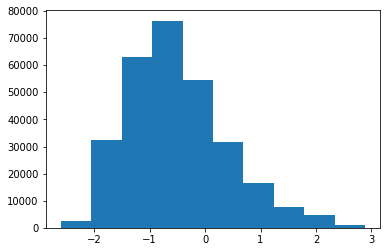

In [6]:
plt.hist(lay_feat[:,:,:,i].ravel())

2. lay_feat_concatenated before reshape (55,55,96,4320)

In [22]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_concat.mat'
lay_concat = h5py.File(dir , 'r')
lay_concat_1 = lay_concat['lay_feat_concatenated'].value
print(lay_concat_1.shape)
ori_lay_concat_1 = np.transpose(lay_concat_1,(3,2,1,0))
print(ori_lay_concat_1.shape)

(4320, 96, 55, 55)
(55, 55, 96, 4320)


/home/jmlee/.conda/envs/encoding/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
b_list = []
for i in range(100):
    r = np.corrcoef(lay_feat_concatenated[:,:,:,i].ravel(), ori_lay_concat_1[:,:,:,i].ravel())[0,1]
    b_list.append(r)
    
print(np.mean(b_list))
print(np.array_equal(lay_feat_concatenated,ori_lay_concat_1))

1.0
True


3. lay_feat_concatenated after reshape to (290400, 4320)

In [5]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_feat_concat_reshape.mat'
lay_concat_reshape = h5py.File(dir , 'r')
print(lay_concat_reshape.keys())
lay_concat_reshape = lay_concat_reshape['lay_feat_concatenated']
lay_concat_reshape = np.transpose(lay_concat_reshape,(1,0))
print(lay_concat_reshape.shape)

<KeysViewHDF5 ['lay_feat_concatenated']>
(290400, 4320)


In [24]:
b_list = []
for i in range(100):
    r = np.corrcoef(lay_feat_concatenated[:,i], lay_concat_reshape[:,i])[0,1]
    b_list.append(r)
    
print(np.mean(b_list))
print(np.array_equal(lay_feat_concatenated,lay_concat_reshape))

0.0002690937778387192
False


3. lay_feat_concatenated_mean

In [8]:
dir = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/check_correaltion/lay_feat_concat_mean.mat'
lay_concat_mean = h5py.File(dir , 'r')
lay_concat_mean = lay_concat_mean['lay_feat_concatenated_mean'].value
lay_concat_mean = np.transpose(lay_concat_mean,(1,0))
print(lay_concat_mean.shape)

(290400, 1)


/home/jmlee/.conda/envs/encoding/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
print(np.array_equal(lay_feat_concatenated_mean,lay_concat_mean))

False


# A

In [33]:
print(np.min(lay_feat_concatenated_reshape))

-2.8308265209198


In [54]:
print(np.min(ori_lay_concat_reshape))

-2.8308265


(array([11344., 18624., 43545., 93334., 76873., 24786.,  8757.,  6749.,
         4318.,  2070.]),
 array([-2.583019  , -2.0469577 , -1.5108964 , -0.97483516, -0.43877387,
         0.09728742,  0.6333487 ,  1.16941   ,  1.7054713 ,  2.2415326 ,
         2.7775939 ], dtype=float32),
 <BarContainer object of 10 artists>)

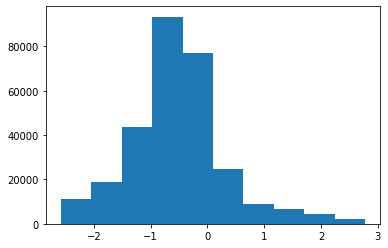

In [36]:
plt.hist(ori_lay_concat_reshape[:,i].ravel())

(array([11344., 18624., 43545., 93334., 76873., 24786.,  8757.,  6749.,
         4318.,  2070.]),
 array([-2.583019  , -2.0469577 , -1.5108964 , -0.97483516, -0.43877387,
         0.09728742,  0.6333487 ,  1.16941   ,  1.7054713 ,  2.2415326 ,
         2.7775939 ], dtype=float32),
 <BarContainer object of 10 artists>)

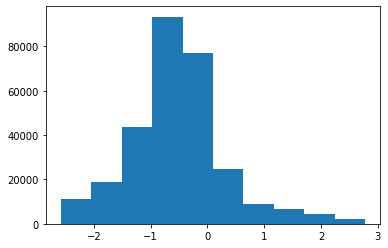

In [51]:
plt.hist(lay_feat_concatenated_reshape[:,i].ravel())

# temp

In [10]:
dim = lay_feat_concatenated.shape
print('dim : ', dim)

lay_feat_concatenated_prod = np.prod(dim[0:3])
# print('lay_feat_concatenated_prod: ', lay_feat_concatenated_prod)

lay_feat_concatenated = np.reshape(lay_feat_concatenated,(lay_feat_concatenated_prod,dim[-1]))
# print('lay_feat_concatenated: ', lay_feat_concatenated.shape)

lay_feat_concatenated_mean= np.mean(lay_feat_concatenated,1)
lay_feat_concatenated_mean = np.expand_dims(lay_feat_concatenated_mean, -1)
# print('lay_feat_concatenated_mean:', lay_feat_concatenated_mean.shape)

lay_feat_concatenated_std = np.std(lay_feat_concatenated,1)
# print('lay_feat_concatenated_std:', lay_feat_concatenated_std.shape)

lay_feat_concatenated_std = np.expand_dims(lay_feat_concatenated_std, -1)
# print('lay_feat_concatenated_std:', lay_feat_concatenated_std.shape)

lay_feat_concatenated = np.subtract(lay_feat_concatenated,lay_feat_concatenated_mean)
# print('lay_feat_concatenated: ', lay_feat_concatenated.shape)

lay_feat_concatenated = np.divide(lay_feat_concatenated,lay_feat_concatenated_std)
# print('lay_feat_concatenated: ', lay_feat_concatenated.shape)

lay_feat_concatenated[np.isnan(lay_feat_concatenated)] = 0  ## NaN to zero
lay_feat_concatenated = np.reshape(lay_feat_concatenated, dim)
# print('lay_feat_concatenated: ', lay_feat_concatenated.shape)

# save([dataroot,'AlexNet_feature_maps_processed_layer1_concatenated.mat'], ...
#     'lay_feat_concatenated','lay_feat_concatenated_mean','lay_feat_concatenated_std','-v7.3');


dim :  (55, 55, 96, 4320)
lay_feat_concatenated_prod:  290400


TypeError: order must be str, not int

In [36]:
b_list = []
for i in range(4320):
    a = lay_feat_concatenated[:,:,:,i]
    a = a.ravel()
    a = np.expand_dims(a, -1)
    b_list.append(a)
lay_feat_concatenated_reshape = np.concatenate(b_list, axis=1)
print(lay_feat_concatenated_reshape.shape)


# lay_feat_concatenated_prod = np.prod(dim[0:3])
# print('lay_feat_concatenated_prod: ', lay_feat_concatenated_prod)

# lay_feat_concatenated = np.reshape(lay_feat_concatenated,lay_feat_concatenated_prod,dim[-1])
# print('lay_feat_concatenated: ', lay_feat_concatenated.shape)


(290400, 4320)


In [40]:
lay_feat_concatenated_mean_f= np.mean(lay_feat_concatenated_reshape,axis=1)
print('lay_feat_concatenated_mean:', lay_feat_concatenated_mean_f.shape)


lay_feat_concatenated_mean: (290400,)


# correlate fmri response to CNN activation time series

In [41]:
fmripath = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/subject1/video_fmri_dataset/subject1/fmri/'
fmripath = fmripath + 'training_fmri.mat'
fmri_file = loadmat(fmripath)["fmri"]
print('fmri_file :', fmri_file.shape)

# fmri_file_keys = fmri_file.keys()
# print('fmri_file_keys: ', fmri_file_keys)
# fmri_file = fmri_file["fmri"]

fmri_data1 = fmri_file
fmri_data2 = fmri_file
print(fmri_data1.shape)
print(fmri_data2.shape)


fmri_file_keys:  dict_keys(['__header__', '__version__', '__globals__', 'Rmat', 'fmri'])
fmri_file : (1, 1)
<class 'numpy.ndarray'>
(1, 1)
(1, 1)


In [59]:
fmripath = '/local_raid3/03_user/jungmin/02_data/Encoding_decoding/encoding_analyzing/02_Goal-Driven-DL/01_NeuralEncodingDecoding/sourcecode/source_code_v2/source_code_v2/subject1/video_fmri_dataset/subject1/fmri/'
load_training_mat = fmripath + 'training_fmri.mat'
fmri_file = loadmat(load_training_mat)["fmri"]
print(fmri_file.shape)

# fmri_data1 = fmri_file['data1']
# fmri_data2 = fmri_file['data2']
# fmri_avg = (fmri_data1 + fmri_data2)/2
# print(fmri_avg.shape)
# fmri_avg = (fmri.data1+fmri.data2) / 2; % average across repeats
# fmri_avg = reshape(fmri_avg, size(fmri_avg,1), size(fmri_avg,2)*size(fmri_avg,3));

(1, 1)


In [68]:
load_feature_maps = dataroot + 'AlexNet_feature_maps_processed_layer1_concatenated.mat'
feature_map_file = loadmat(load_feature_maps)

NotImplementedError: Please use HDF reader for matlab v7.3 files